In [ ]:
import pandas as pd

#load data set
data = pd.read_csv("/content/Walmart DataSet.csv")
print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000

In [ ]:
print(data.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


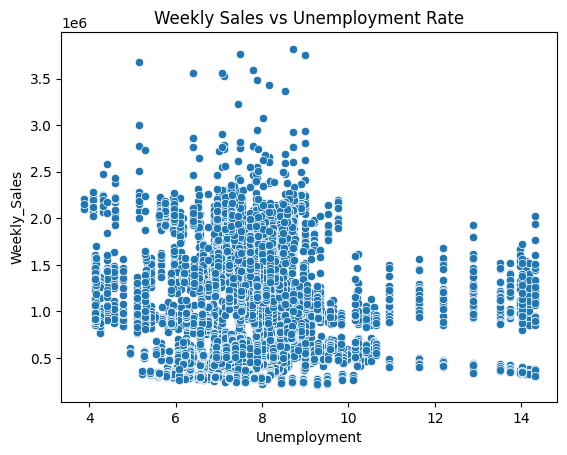

Store
38   -0.785290
44   -0.780076
39   -0.384681
42   -0.356355
41   -0.350630
4    -0.337015
17   -0.263600
3    -0.230413
37   -0.221287
5    -0.207043
43   -0.201954
9    -0.191534
13   -0.171633
7    -0.165382
40   -0.112528
32   -0.099455
1    -0.097955
20   -0.095341
23   -0.077169
16   -0.070864
26   -0.066899
31   -0.064738
8    -0.052580
11   -0.020339
27   -0.014275
24   -0.012261
12   -0.009286
25   -0.004958
45   -0.004041
34    0.017010
22    0.039043
6     0.044251
2     0.066325
15    0.078905
29    0.084682
33    0.101175
19    0.101464
10    0.131908
28    0.136671
18    0.139179
30    0.201862
14    0.210786
21    0.218367
35    0.483865
36    0.833734
dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Weekly Sales vs Unemployment Rate
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=data)
plt.title('Weekly Sales vs Unemployment Rate')
plt.show()

# Group by Store and calculate correlation between Weekly Sales and Unemployment
unemployment_correlation = data.groupby('Store').apply(lambda df: df['Weekly_Sales'].corr(df['Unemployment']))
print(unemployment_correlation.sort_values())


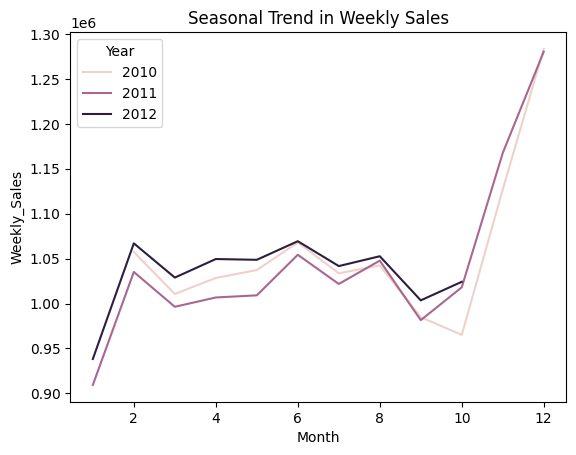

In [ ]:
# Convert Date to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y') # Specify the correct date format

# Extract month and year from Date
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Group by month and year and calculate average weekly sales
seasonal_sales = data.groupby(['Year', 'Month'])['Weekly_Sales'].mean().reset_index()

# Line plot for Seasonal Trend
sns.lineplot(x='Month', y='Weekly_Sales', hue='Year', data=seasonal_sales)
plt.title('Seasonal Trend in Weekly Sales')
plt.show()

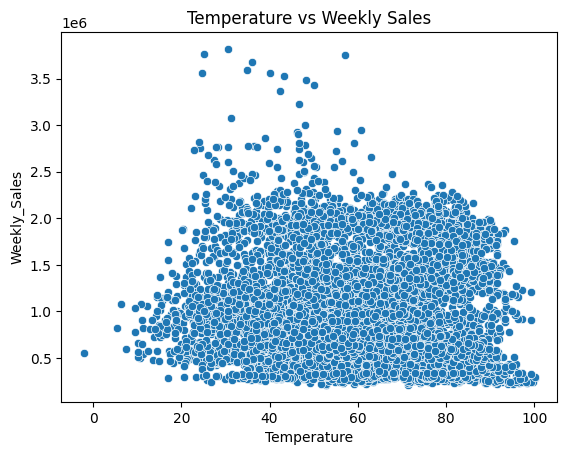

In [ ]:
# Scatter plot for Temperature vs Weekly Sales
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
plt.title('Temperature vs Weekly Sales')
plt.show()


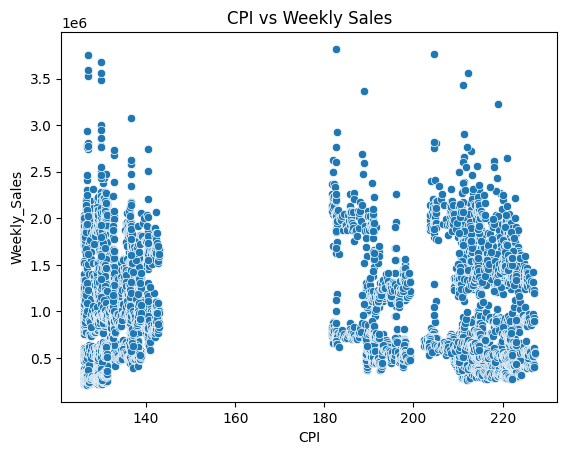

In [ ]:
# Scatter plot for CPI vs Weekly Sales
sns.scatterplot(x='CPI', y='Weekly_Sales', data=data)
plt.title('CPI vs Weekly Sales')
plt.show()


In [ ]:
# Group by Store and calculate total weekly sales
top_performing_stores = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
print(top_performing_stores.head())


Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


In [ ]:
# Worst performing store
worst_performing_store = top_performing_stores.tail(1)
print(worst_performing_store)

# Difference between the highest and lowest performing stores
difference = top_performing_stores.max() - top_performing_stores.min()
print(f"Difference between highest and lowest performing stores: {difference}")


Store
33    37160221.96
Name: Weekly_Sales, dtype: float64
Difference between highest and lowest performing stores: 264237570.49999997


In [ ]:
from prophet import Prophet

# Forecast sales for each store
forecasts = []

for store in data['Store'].unique():
    store_data = data[data['Store'] == store]
    store_data = store_data[['Date', 'Weekly_Sales']]
    store_data.columns = ['ds', 'y']

    model = Prophet()
    model.fit(store_data)

    future = model.make_future_dataframe(periods=12, freq='W')
    forecast = model.predict(future)

    forecast['Store'] = store
    forecasts.append(forecast[['ds', 'yhat', 'Store']])

# Combine all forecasts
forecast_df = pd.concat(forecasts)

# Save the forecast to a CSV file
forecast_df.to_csv('sales_forecast.csv', index=False)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyyz1o301/mtzgt6my.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyyz1o301/pawnip5b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44342', 'data', 'file=/tmp/tmpyyz1o301/mtzgt6my.json', 'init=/tmp/tmpyyz1o301/pawnip5b.json', 'output', 'file=/tmp/tmpyyz1o301/prophet_model85e57h9e/prophet_model-20240625105418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:54:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:54:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit